# 1) Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import pickle
import seaborn as sn
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

: 

## CONTEXT AND CONTENT
A company that is into big data and also organizes data science training wants to employ data scientist out of the people that took part in the data science training. They wish to be able to predict based on information provided by people applying for their training if they will work for the company or take up employment elsewere post training. This is necessary in order for the company to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.
Model can also be used by HR to predict candidates decision after training. 

# 2) Importing Cleaned Data


In [2]:
df = pd.read_csv('clean_data.csv')
df.head()

,Unnamed: 0,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,2,Pvt Ltd,1,36,1.0
1,1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,2,Pvt Ltd,5,47,0.0
2,2,city_21,Male,No relevent experience,Full time course,Graduate,STEM,5,2,Pvt Ltd,0,83,0.0
3,3,city_115,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,2,Pvt Ltd,0,52,1.0
4,4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,21,2,Funded Startup,4,8,0.0


### FEATURES DESCRIPTION
- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- last_new_job: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

# 3) Data Visualization

## 3.1) Plot of Gender vs. Target

<AxesSubplot:xlabel='gender', ylabel='count'>

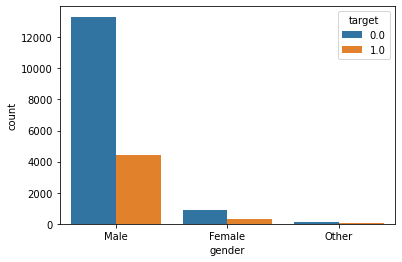

In [3]:
sn.countplot(data=df,x='gender',hue='target')

## 3.2) Plot of Relevant Experience vs. Target

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

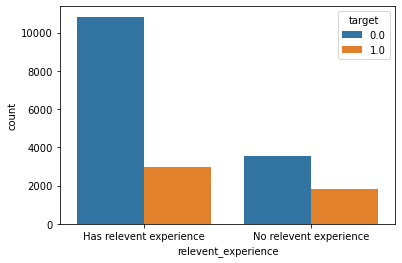

In [4]:
sn.countplot(data=df,x='relevent_experience',hue='target')

## 3.3) Plot of Enrolled University vs. Target

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

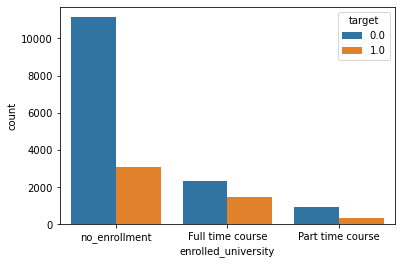

In [5]:
sn.countplot(data=df,x='enrolled_university',hue='target')

## 3.4) Plot of Education Level vs. Target

<AxesSubplot:xlabel='education_level', ylabel='count'>

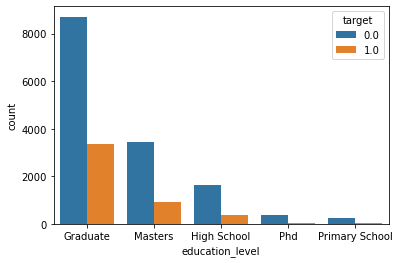

In [6]:
sn.countplot(data=df,x='education_level',hue='target')

## 3.5) Plot of Discipline vs. Target

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

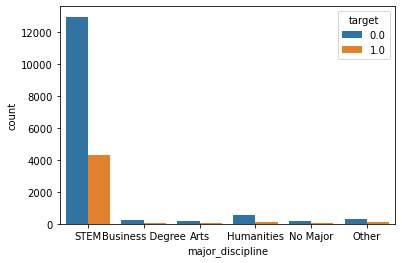

In [7]:
sn.countplot(data=df,x='major_discipline',hue='target')

## 3.6) Plot of Experience vs. Target

<AxesSubplot:xlabel='target', ylabel='experience'>

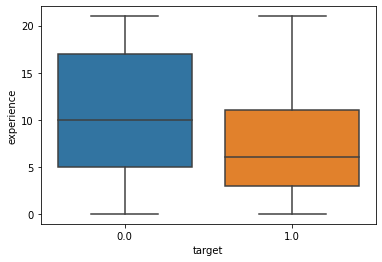

In [8]:
sn.boxplot(data=df, x='target', y='experience')

## 3.7) Plot of Company Size vs. Target

<AxesSubplot:xlabel='company_size', ylabel='count'>

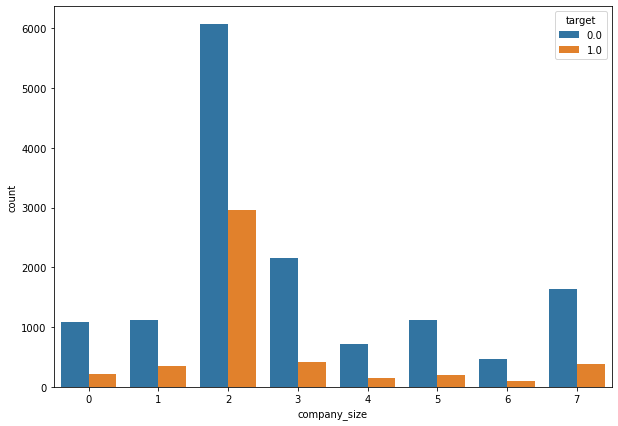

In [9]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='company_size',hue='target')

## 3.8) Plot of Company Type vs Target

<AxesSubplot:xlabel='company_type', ylabel='count'>

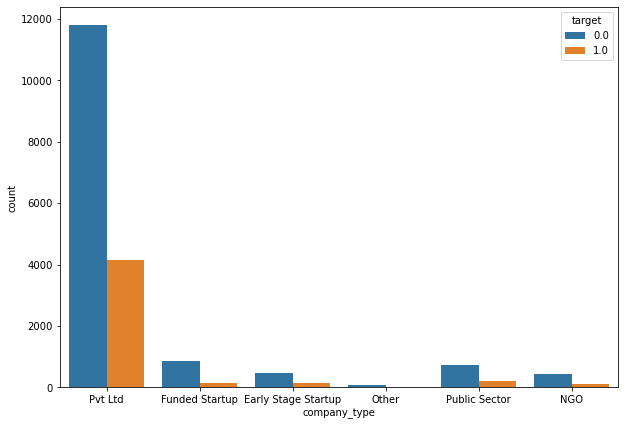

In [10]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x='company_type',hue='target')

## 3.9) Plot of Last New Job vs. Target

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

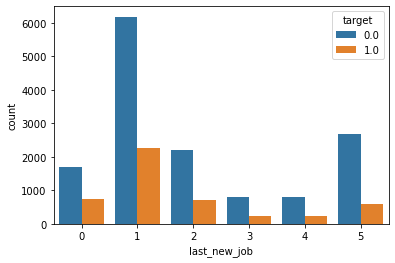

In [11]:
sn.countplot(data=df,x='last_new_job',hue='target')

## 3.10) Plot of Training Hours vs. Target

<AxesSubplot:xlabel='target', ylabel='training_hours'>

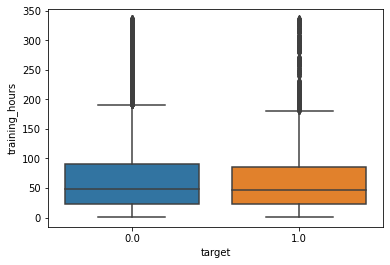

In [12]:
sn.boxplot(data=df,y='training_hours',x='target')

## 3.11) Results

### As we can see, the dataset is imbalanced

In [13]:
df_target1 = df[df.target==1]
df_target0 = df[df.target==0]

In [14]:
print(len(df_target1),len(df_target0))

4777 14381


# 4) Data Exploration and Preprocessing

In [15]:
df.shape

(19158, 13)

In [16]:
df.nunique()

Unnamed: 0             19158
city                     123
gender                     3
relevent_experience        2
enrolled_university        3
education_level            5
major_discipline           6
experience                22
company_size               8
company_type               6
last_new_job               6
training_hours           241
target                     2
dtype: int64

## Using Label Encoder to Convert Categorical Variables to Numeric

In [17]:
LE = LabelEncoder()

In [18]:
cols = df.select_dtypes(include=['object']).columns
df[cols]=df[cols].apply(LE.fit_transform)
df.head()

,Unnamed: 0,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,5,1,0,2,0,5,21,2,5,1,36,1.0
1,1,77,1,1,2,0,5,15,2,5,5,47,0.0
2,2,64,1,1,0,0,5,5,2,5,0,83,0.0
3,3,14,1,1,2,0,1,0,2,5,0,52,1.0
4,4,50,1,0,2,2,5,21,2,1,4,8,0.0


# 5) Heatmap to get Correlation of each attribute with target 

<AxesSubplot:>

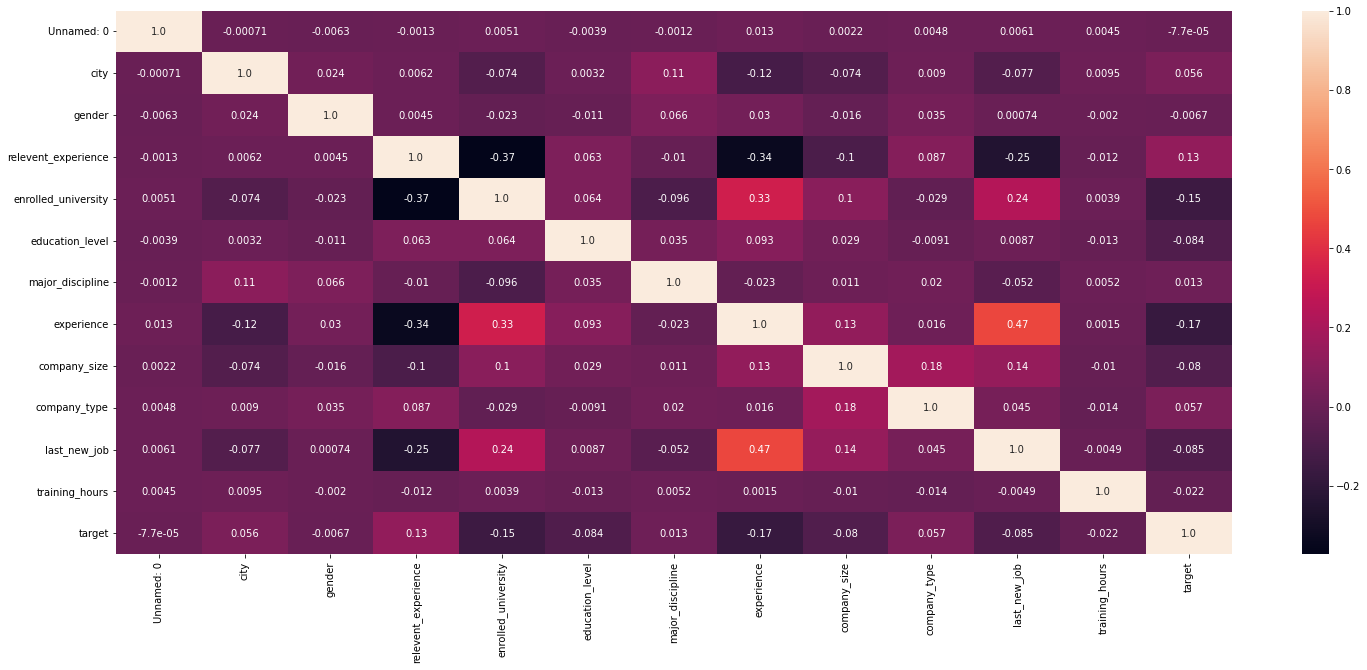

In [19]:
corr = df.corr()
plt.figure(figsize=(25,10))
sn.heatmap(corr,annot=True,fmt='.2')

## Results <br>
As we can see, the five attributes with the highest correlation are:<br>
1) Experience<br>
2) Enrolled University<br>
3) Relevant Experience<br>
4) Company Size<br>
5) Last New Job<br>
 <br>


# 6) Handling Imbalance using SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique<br>
ENN stands for Edited Nearest Neighbors<br>
df_target1 is the minority class<br>
We need to balance by upsampling number of values

In [20]:
smote = SMOTE(random_state=42)

In [21]:
inputs = df[['experience','enrolled_university','relevent_experience','company_size','last_new_job']]
target = df['target']

inputs.head()

,experience,enrolled_university,relevent_experience,company_size,last_new_job
0,21,2,0,2,1
1,15,2,1,2,5
2,5,0,1,2,0
3,0,2,1,2,0
4,21,2,0,2,4


In [22]:
inputs, target = smote.fit_resample(inputs, target)

In [23]:
len(inputs)

28762

<AxesSubplot:xlabel='target', ylabel='count'>

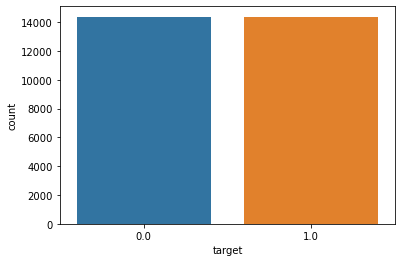

In [24]:
# Plot showing target has been balanced
target_df = pd.DataFrame(target)
sn.countplot(data = target_df, x = "target")

# 7) Splitting Dataset into Training Set and Test Set 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.25, random_state=40)

In [26]:
len(x_train)

21571

In [27]:
len(x_test)

7191

# 8) Testing Models and Comparing Accuracy

# 8.1) Linear Regression

In [28]:
LM = linear_model.LinearRegression()
LM.fit(x_train, y_train)

LinearRegression()

In [29]:
LM.coef_

array([-0.01307883, -0.06197378,  0.00747503, -0.01718079,  0.00390934])

In [30]:
LM.intercept_

0.749379876776854

In [31]:
LM.score(x_test, y_test)

0.05970189886407584

# 8.2) Naive Bayes

In [32]:
GNB = GaussianNB()
MNB = MultinomialNB()

GNB.fit(x_train, y_train)
MNB.fit(x_train, y_train)

MultinomialNB()

In [33]:
GNB.score(x_test, y_test)

0.6065915727993325

In [34]:
MNB.score(x_test, y_test)

0.5790571547768043

# 8.3) Decision Tree

In [35]:
DT = tree.DecisionTreeClassifier()

DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
DT.score(x_test, y_test)

0.6672229175358086

# 8.4) Support Vector Machine

In [37]:
sv = SVC()

sv.fit(x_train, y_train)

SVC()

In [38]:
sv.score(x_test, y_test)

0.6134056459463217

# 8.5) Random Forest Classifier

In [39]:
RFC = RandomForestClassifier()

RFC.fit(x_train, y_train)

RandomForestClassifier()

In [40]:
RFC.score(x_test, y_test)

0.6673619802530941

# 8.6) XGB Classifier

In [41]:
xgc = XGBClassifier()
xgc.fit(inputs, target)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [42]:
xgc.score(x_test, y_test)

0.6953135864274788

# 8.7) Results<br>
### We found that Random Forest Classifier give us the best results<br> <br>

# 9) Hyper Parameter Tuning using RandomSearchCV
RandomSearchCV is a library function that is a member of sklearn's model_selection package. It randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output 

In [43]:
rs = RandomizedSearchCV(RandomForestClassifier(),{
    'max_depth':[2, 3, 5, 8],                                     # Defines the longest path allowed between root node and leaf node
    'n_estimators':[100, 150, 200, 300],                          # Number of Trees
    'max_samples':[0.1, 0.2, 0.3]                                 # Fraction of Original Dataset to be given to each tree
    },
      cv=5,
      return_train_score=False,
      n_iter=10
    )

In [44]:
rs.fit(inputs, target)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 8],
                                        'max_samples': [0.1, 0.2, 0.3],
                                        'n_estimators': [100, 150, 200, 300]})

In [45]:
pd.DataFrame(rs.cv_results_)[['param_max_depth','param_n_estimators','param_max_samples','mean_test_score']]


,param_max_depth,param_n_estimators,param_max_samples,mean_test_score
0,8,100,0.2,0.647835
1,5,300,0.2,0.624748
2,5,100,0.2,0.623149
3,5,200,0.3,0.624192
4,2,300,0.1,0.610702
5,5,150,0.1,0.625826
6,3,200,0.1,0.616230
7,5,200,0.2,0.624018
8,8,100,0.3,0.647834
9,8,300,0.1,0.644636


# 10) Final Model

In [46]:
RFC = RandomForestClassifier(n_estimators=2000,max_depth=200)

RFC.fit(x_train, y_train)

RandomForestClassifier(max_depth=200, n_estimators=2000)

In [47]:
RFC.score(x_test, y_test)

0.6677791684049507

# 11) Confusion Matrix

In [48]:
y_pred = RFC.predict(x_test)

Text(42.0, 0.5, 'Actual')

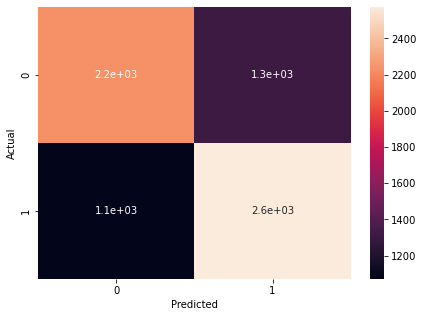

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

# 12) Classification Report

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.63      0.65      3545
         1.0       0.66      0.71      0.68      3646

    accuracy                           0.67      7191
   macro avg       0.67      0.67      0.67      7191
weighted avg       0.67      0.67      0.67      7191



# 14) Testing


In [51]:
from sklearn.cluster import KMeans

In [52]:
kmodel = KMeans(n_clusters=2)

In [53]:
kmodel.fit(x_train, y_train)

KMeans(n_clusters=2)

In [54]:
y_pred_kmeans = kmodel.fit_predict(x_test)

In [55]:
print(classification_report(y_test, y_pred_kmeans))

              precision    recall  f1-score   support

         0.0       0.44      0.60      0.50      3545
         1.0       0.39      0.25      0.30      3646

    accuracy                           0.42      7191
   macro avg       0.41      0.42      0.40      7191
weighted avg       0.41      0.42      0.40      7191



Testing Spectral Clustering

In [56]:
spec_model = SpectralClustering(n_clusters=2)

In [57]:
y_pred_spec = spec_model.fit_predict(x_test)

In [58]:
print(classification_report(y_test, y_pred_spec))

              precision    recall  f1-score   support

         0.0       0.46      0.76      0.57      3545
         1.0       0.38      0.15      0.21      3646

    accuracy                           0.45      7191
   macro avg       0.42      0.45      0.39      7191
weighted avg       0.42      0.45      0.39      7191



In [59]:
# creating pickle file for deployment
file = open('pickled_RFC.pkl', 'wb')
pickle.dump(RFC, file)

In [60]:
# Feature importance to see most important feature in predicting target
feat_imp = RFC.feature_importances_
feat_imp

array([0.44175063, 0.09552659, 0.04124339, 0.24190553, 0.17957386])

<AxesSubplot:>

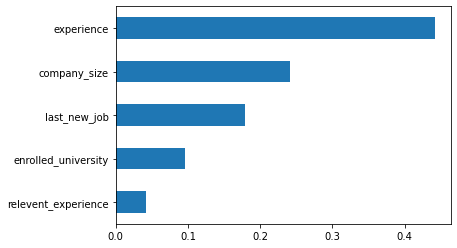

In [61]:
feat = pd.Series(feat_imp, x_train.columns).sort_values()
feat.plot(kind='barh')

In [63]:
!pip install numpy